### Problem 2. Basic Bidding Strategy

1. Constant Bidding Strategy (Const)
2. Random Bidding Strategy (Rand)
3. Considering Competition among random bidding agents

### 1. Constant bidding strategy

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')    


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"1,386,610,111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"1,007,510,057,100,240,000,000,000,000,000,000,..."
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"1,386,610,024,100,590,000,000,000,000,000,000,..."
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"1,386,610,057,100,060,000,000,000"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10,006,100,631,377,600,000"


In [2]:
#min and max prices from the dataset, in order to see extreme ranges

# print(' TrainDF min: ',   train_df['payprice'].min(), '\n',
#        'TrainDF max: ',   train_df['payprice'].max())

print(' ValidationDF min: ',   validation_df['payprice'].min(), '\n',
       'ValidationDF max: ',   validation_df['payprice'].max())


 ValidationDF min:  0 
 ValidationDF max:  300


In [3]:
#we don't need the whole dataset, so only required columns left

validation_df_part = validation_df[['click', 'bidprice', 'payprice']]

validation_df_part.head()


,click,bidprice,payprice
0,0,300,23
1,0,238,75
2,0,238,65
3,0,238,6
4,0,249,5


In [4]:
#line by line search for optimal constant bidding strategy

import numpy as np

results = np.empty((300, 5), dtype=object)  #resulting 2D numpy array

for j in range (1,301):    #the range which is based on minimum and maximum prices
    
    impressions = 0
    clicks = 0
    budget = 6250000    #maximum budget
    CTR = 0
    
    for i in range(0, len(validation_df_part)):      
        if budget > j:
            impressions += 1
            if j > (validation_df_part['payprice'].values[i]):
                clicks += validation_df_part['click'].values[i]
                budget = budget - validation_df_part['payprice'].values[i]
        else: 
            break
            
    results[j-1, 0] = j                                  #constant price
    results[j-1, 1] = impressions                        #number of impression
    results[j-1, 2] = clicks                             #numer of clicks
    results[j-1, 3] = round(clicks / impressions,6)      #CTR
    results[j-1, 4] = (6250000 - budget)/1000            #spent budget
             

In [5]:
# option to see all results

np.set_printoptions(threshold=np.inf)

# sort from top to down by number of clicks

results[results[:,2].argsort()[::-1]]     

array([[80, 228415, 68, 0.000298, 6249.957],
       [78, 231710, 68, 0.000293, 6249.942],
       [79, 229791, 67, 0.000292, 6249.926],
       [90, 180645, 67, 0.000371, 6249.954],
       [82, 208222, 67, 0.000322, 6249.952],
       [81, 210376, 66, 0.000314, 6249.933],
       [83, 206744, 66, 0.000319, 6249.959],
       [84, 205159, 66, 0.000322, 6249.94],
       [85, 198322, 66, 0.000333, 6249.941],
       [86, 196051, 66, 0.000337, 6249.918],
       [87, 194272, 66, 0.00034, 6249.954],
       [89, 184552, 66, 0.000358, 6249.93],
       [92, 177503, 66, 0.000372, 6249.923],
       [95, 174370, 65, 0.000373, 6249.922],
       [94, 175618, 65, 0.00037, 6249.911],
       [93, 176632, 65, 0.000368, 6249.92],
       [91, 179233, 65, 0.000363, 6249.913],
       [96, 171946, 65, 0.000378, 6249.919],
       [98, 169984, 65, 0.000382, 6249.952],
       [97, 170844, 65, 0.00038, 6249.962],
       [71, 287870, 65, 0.000226, 6249.944],
       [88, 192876, 65, 0.000337, 6249.941],
       [72, 2843

In [6]:
#sort from top to down by CTR

results[results[:,3].argsort()[::-1]]   


array([[260, 83763, 54, 0.000645, 6249.911],
       [259, 83851, 54, 0.000644, 6249.924],
       [258, 83953, 54, 0.000643, 6249.746],
       [256, 84155, 54, 0.000642, 6249.771],
       [257, 84052, 54, 0.000642, 6249.894],
       [255, 84238, 54, 0.000641, 6249.757],
       [254, 84320, 54, 0.00064, 6249.78],
       [300, 79838, 51, 0.000639, 6249.802],
       [253, 84441, 54, 0.000639, 6249.749],
       [252, 84637, 54, 0.000638, 6249.847],
       [299, 79876, 51, 0.000638, 6249.738],
       [296, 79965, 51, 0.000638, 6249.747],
       [297, 79933, 51, 0.000638, 6249.861],
       [298, 79904, 51, 0.000638, 6249.709],
       [295, 80002, 51, 0.000637, 6249.76],
       [264, 83195, 53, 0.000637, 6249.964],
       [251, 84805, 54, 0.000637, 6249.778],
       [281, 81616, 52, 0.000637, 6249.797],
       [294, 80044, 51, 0.000637, 6249.72],
       [292, 80210, 51, 0.000636, 6249.808],
       [293, 80150, 51, 0.000636, 6249.769],
       [262, 83380, 53, 0.000636, 6249.766],
       [263, 8

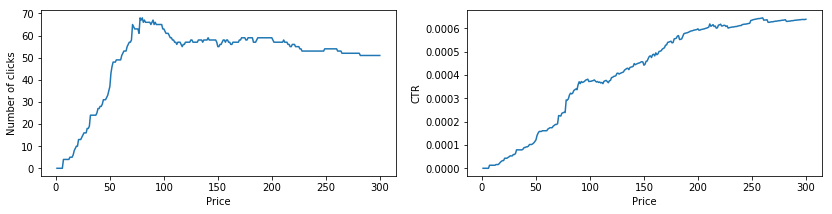

In [8]:
#visualisations 

import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))

#by clicks
plt.subplot(421)
plt.plot(results[:,0], results[:,2])
plt.xlabel('Price')
plt.ylabel('Number of clicks')

#by CTR
plt.subplot(422)
plt.plot(results[:,0], results[:,3])
plt.xlabel('Price')
plt.ylabel('CTR')

plt.show()


In [9]:
del results


###  2. Random bidding strategy

In [10]:
# import pixiedust

In [11]:
# %%pixie_debugger

import numpy as np
from random import randrange

results = np.empty((465,7), dtype=object)   #the range (465,6) for numpy array was assigned manually after simple calculations

n=0  # counter

for lowerbound in range(0,300,10):          #step is 10, otherwise runs too long
    for upperbound in range(5,305,10):      #step is 10, otherwise runs too long
        impressions = 0
        clicks = 0
        budget = 6250000
        CTR = 0
        criteria1 = 0
      
        if lowerbound < upperbound:
            for i in range(0, len(validation_df_part)):   
                j = randrange(lowerbound, upperbound)
                if budget > j:
                    impressions += 1
                    if j > (validation_df_part['payprice'].values[i]):
                        clicks += validation_df_part['click'].values[i]
                        criteria1 = criteria1 + 1   # number of won impressions based on criteria #1
                        budget = budget - validation_df_part['payprice'].values[i]
            
            results[n, 0] = lowerbound                     #lowerband
            results[n, 1] = upperbound                     #upperband
            results[n, 2] = impressions                    #number of impression
            results[n, 3] = clicks                         #numer of clicks
            results[n, 4] = round(clicks / impressions,6)  #CTR
            results[n, 5] = criteria1                      #criteria 1
            results[n, 6] = (6250000 - budget)/1000        #spent budget    
       
            n = n+1        

In [12]:
#sort from top to down by number of clicks

results[results[:,3].argsort()[::-1]] 

array([[20, 115, 303925, 89, 0.000293, 153370, 6114.436],
       [20, 135, 258530, 76, 0.000294, 144089, 6249.987],
       [30, 135, 238561, 73, 0.000306, 141420, 6249.989],
       [50, 135, 200793, 72, 0.000359, 134271, 6249.994],
       [40, 135, 219258, 71, 0.000324, 137960, 6249.961],
       [30, 125, 256695, 70, 0.000273, 146498, 6249.971],
       [10, 125, 303925, 70, 0.00023, 149781, 6185.271],
       [20, 165, 211408, 70, 0.000331, 131111, 6249.992],
       [30, 105, 303925, 69, 0.000227, 155197, 6008.325],
       [30, 195, 170285, 68, 0.000399, 119498, 6249.978],
       [20, 185, 189128, 68, 0.00036, 123939, 6249.981],
       [70, 75, 292754, 68, 0.000232, 163416, 6249.973],
       [0, 135, 300787, 68, 0.000226, 145379, 6249.995],
       [30, 145, 223082, 68, 0.000305, 137024, 6249.971],
       [50, 85, 303925, 68, 0.000224, 156856, 5727.956],
       [70, 105, 200304, 67, 0.000334, 136692, 6249.971],
       [0, 275, 148008, 67, 0.000453, 104311, 6249.997],
       [30, 115, 281

In [13]:
#sort from top to down by Criteria #1

results[results[:,5].argsort()[::-1]] 

array([[70, 75, 292754, 68, 0.000232, 163416, 6249.973],
       [60, 85, 288504, 67, 0.000232, 161442, 6249.94],
       [50, 95, 282232, 65, 0.00023, 158081, 6249.965],
       [50, 85, 303925, 68, 0.000224, 156856, 5727.956],
       [40, 95, 303925, 61, 0.000201, 156254, 5888.243],
       [40, 105, 282606, 66, 0.000234, 155706, 6249.979],
       [30, 105, 303925, 69, 0.000227, 155197, 6008.325],
       [60, 75, 303925, 60, 0.000197, 153740, 5398.839],
       [20, 115, 303925, 89, 0.000293, 153370, 6114.436],
       [30, 115, 281777, 67, 0.000238, 152893, 6249.98],
       [70, 85, 245947, 64, 0.00026, 150562, 6249.938],
       [60, 95, 249436, 67, 0.000269, 150493, 6249.958],
       [10, 125, 303925, 70, 0.00023, 149781, 6185.271],
       [20, 125, 281059, 63, 0.000224, 149690, 6249.987],
       [50, 105, 250112, 65, 0.00026, 149240, 6249.997],
       [40, 115, 255423, 67, 0.000262, 148391, 6249.972],
       [30, 125, 256695, 70, 0.000273, 146498, 6249.971],
       [0, 135, 300787, 68, 




###  3. Random bidding strategy with multiple agents

In [15]:
#for testing only
#validation_df_part_test = validation_df_part.tail(10) 

#validation_df_part_test.head(10)

In [4]:
import numpy as np
from random import randrange

results = np.empty((len(validation_df_part), 4), dtype=object)        #this is resulting array which includes all bidding 
                                                                      #history with IDs (indexes) for each agent 

# manually chosen lower and upper bounds (which were best in the previous experiment)
lowerbound = 30
upperbound = 105

clicks = 0
criteria = 0
      
for i in range(0, len(validation_df_part)):   
    
    agents = np.empty((100,2), dtype = object)    #separate numpy array for 50/100 agents
        
    for j in range(0,100):                   # number of agents chosen as 50/100 
        
        price = randrange(lowerbound, upperbound)    #prices for each agent
        
        agents[j, 0] = j+1
        agents[j, 1] = price
        
    agentid = agents[:,1].argmax()+1
    agentprice = max(agents[:,1])
    
    if agentprice > (validation_df_part['payprice'].values[i]):
        clicks = validation_df_part['click'].values[i]
        criteria = 1                                         # 1  if impression won based on criteria 2
    else:
        clicks = 0
        criteria = 0
        
    results[i, 0] = agentid                       # agent id
    results[i, 1] = agentprice                    # agent's price
    results[i, 2] = clicks                        # numer of clicks
    results[i, 3] = criteria                      # CTR
        

In [5]:
import pandas as pd

NEWDF = pd.DataFrame({'AgentID':results[:,0],'Price':results[:,1], 'Clicks':results[:,2], 'WonImpressions':results[:,3]})

NEWDF.groupby('AgentID').agg({'Price':'sum', 'Clicks':'sum', 'WonImpressions':'sum'})

,Price,Clicks,WonImpressions
AgentID,,,
1,563689,5,4194
2,566500,1,4183
3,549156,3,4096
4,550130,1,4056
5,541856,4,4006
6,532488,0,3984
7,526211,2,3940
8,531705,6,3936
9,512368,1,3752


In [38]:
del NEWDF, agents, results, validation_df_part, validation_df